In [1]:
import os

import argparse
import pandas as pd

from fragt2vec.utility import SELECTED_MD, get_format_time, find_nearest_neighbor, draw_multiple_mol, show_each_md, reduce_by_tsne

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

import rdkit
from rdkit.Chem.Draw import IPythonConsole
# IPythonConsole.ipython_useSVG = True
from IPython.display import SVG

import rdkit.Chem as Chem
from rdkit.Chem import Draw

rdkit.__version__

'2019.03.3'

In [2]:
root_dir = '../../big_data/05_model_Tandem2vec/'
need_plot_md = ['nN', 'nS', 'nBondsD', 'naRing']

In [3]:
frag2info = pd.read_csv(os.path.join(root_dir, 'frag_smiles2md.csv'), index_col=0)
frag2info = frag2info.loc[:, need_plot_md]
frag2info.head(2)

,nN,nS,nBondsD,naRing
fragment,,,,
CC,0,0,0,0
C,0,0,0,0


In [18]:
minn = 0
maxn = 0

frag_id2vec_file = 'frag_id2vec_minn_{}_maxn_{}.csv'.format(minn, maxn)
frag2vec_fp = os.path.join(root_dir, frag_id2vec_file)

In [19]:
frag2vec = pd.read_csv(frag2vec_fp, index_col='fragment')
x_reduced = reduce_by_tsne(frag2vec)
x_reduced = pd.DataFrame(data=x_reduced, index=frag2vec.index)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3056 samples in 0.040s...
[t-SNE] Computed neighbors for 3056 samples in 0.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3056
[t-SNE] Computed conditional probabilities for sample 2000 / 3056
[t-SNE] Computed conditional probabilities for sample 3000 / 3056
[t-SNE] Computed conditional probabilities for sample 3056 / 3056
[t-SNE] Mean sigma: 0.007183
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.686256
[t-SNE] KL divergence after 2000 iterations: 3.667272
(3056, 2)
t-SNE took 13.9s.


#### fig. 3-2, 3-3

  >Start to plot t-SNE vis of fragment vector...


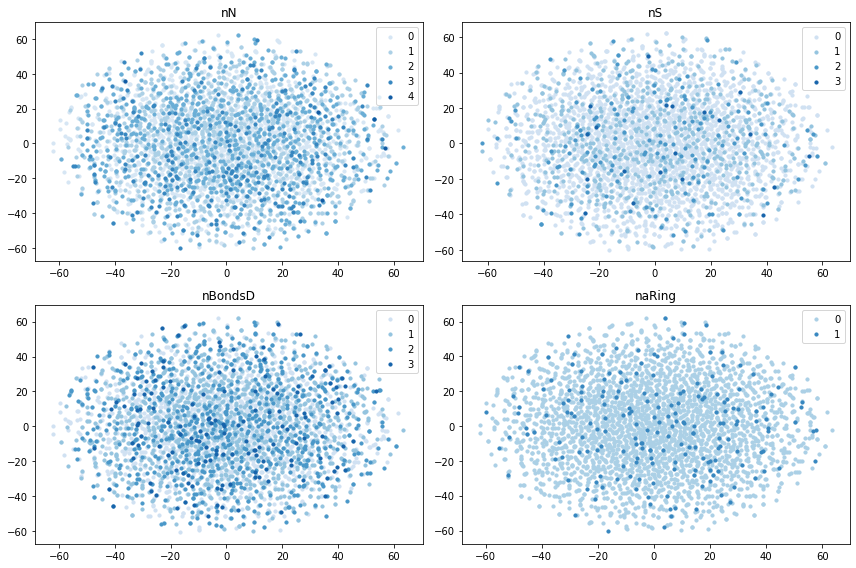

In [20]:
print('  >Start to plot t-SNE vis of fragment vector...')
save_fig_path = os.path.join('./chapter3_figure/', 't-SNE_vis_ws_{}_minn_{}_maxn_{}.png'.format(4, minn, maxn))
fig = show_each_md(x_reduced=x_reduced, frag_info=frag2info,
             file_path=save_fig_path)
fig.savefig(save_fig_path, dpi=200)

#### fragment similarity

In [21]:
q_frags = ["C1=COCO1" ,"C1=CCNN=C1" ,"C1=CCC1" ,"OBr", "S=S" ,"C1#CNCC1"]
[i in frag2vec.index for i in q_frags]

[True, True, True, True, True, True]

In [22]:
q_frag2vec = frag2vec.loc[q_frags, :].copy()

In [23]:
topn = 4
nn = find_nearest_neighbor(training_mol_vec_fp=frag2vec_fp, query_mol_vec_df=q_frag2vec, top_n=topn)

current line: 0


In [24]:
def save_fig(fig, file_path):
    with open(file_path, 'w') as f_handle:
        try:
            f_handle.write(fig)
        except TypeError:
            f_handle.write(fig.data)

In [25]:
smiles_list = []
dis = []
legends = []
for inx in range(len(q_frags)):
    smiles_list += [i.split(": ")[0] for i in nn[inx][q_frags[inx]].split('; ')]
    dis += [str('{:.8f}').format(float(i.split(": ")[1])) for i in nn[inx][q_frags[inx]].split('; ')]
    # print(dis)
    # print(inx, smiles_list)
legends += ['{}({})'.format(smiles_list[i],dis[i]) for i in range(len(smiles_list))]
fig = draw_multiple_mol(smiles_list=smiles_list, mols_per_row=topn, legends=legends)
save_fig(fig, file_path='./chapter3_figure/top{}_minn_{}_maxn_{}.svg'.format(topn, minn, maxn))

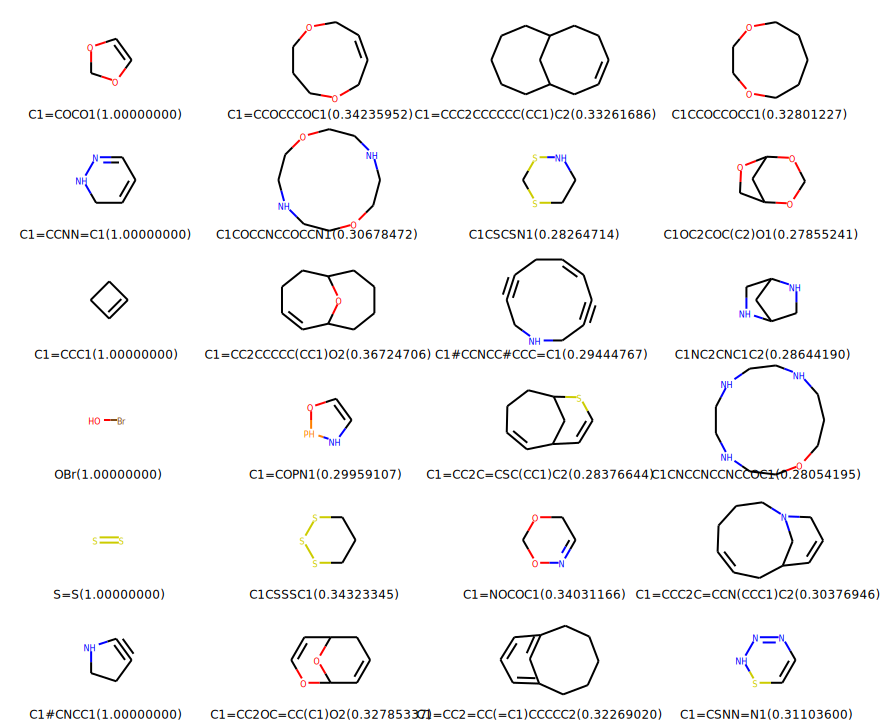

In [26]:
fig